# Lab 2 Report:
## Iris Classification with Regression

### Name:

In [1]:
# Import neccessary packages

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch

In [2]:
from IPython.display import Image # For displaying images in colab jupyter cell

In [ ]:
Image('lab2_exercise1.PNG', width = 1000)

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

FileNotFoundError: No such file or directory: 'lab2_exercise1.PNG'

<IPython.core.display.Image object>

## Prepare Data

In [3]:
from sklearn.datasets import load_iris

# iris dataset is available from scikit-learn package
iris = load_iris()

# Load the X (features) and y (targets) for training
X_train = iris['data']
y_train = iris['target']

# Load the name labels for features and targets
feature_names = iris['feature_names']
names = iris['target_names']

# Feel free to perform additional data processing here (e.g. standard scaling)

In [4]:
# Print the first 10 training samples for both features and targets

print(X_train[:10, :], y_train[:10])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]] [0 0 0 0 0 0 0 0 0 0]


In [5]:
# Print the dimensions of features and targets

print(X_train.shape, y_train.shape)

(150, 4) (150,)


In [6]:
# feature_names contains name for each column in X_train
# For targets, 0 -> setosa, 1 -> versicolor, 2 -> virginica

print(feature_names, names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'] ['setosa' 'versicolor' 'virginica']


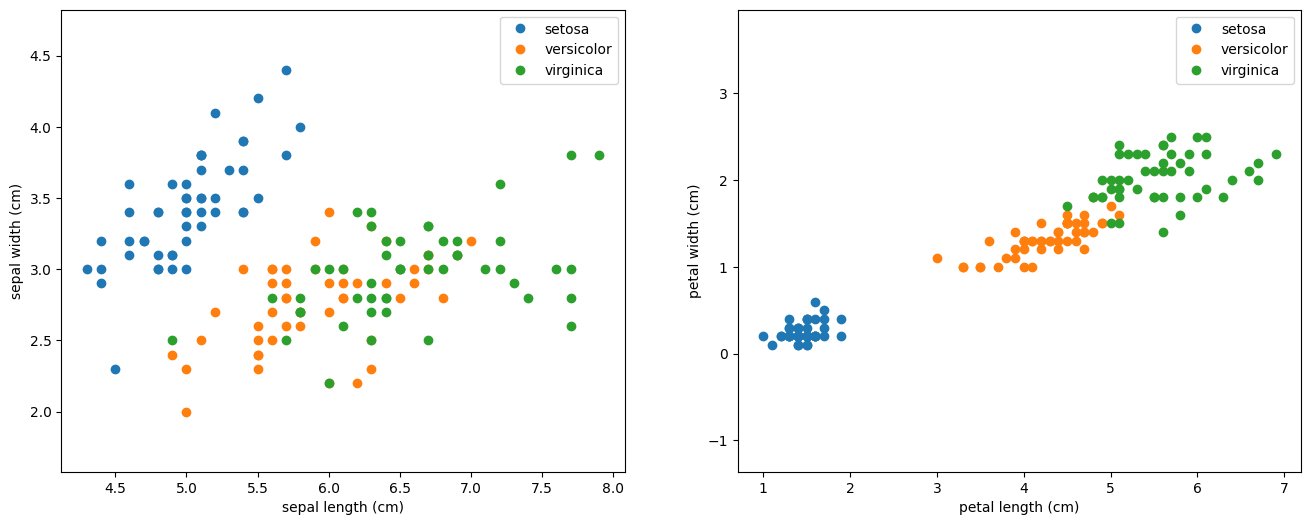

In [7]:
# We can visualize the dataset before training

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# enumerate picks up both the index (0, 1, 2) and the element ('setosa', 'versicolor', 'virginica') from "names"
# loop 1: target = 0, target_name = 'setosa'
# loop 2: target = 1, target_name = 'versicolor' etc

for target, target_name in enumerate(names):

    # Subset the rows of X_train that fall into each flower category using boolean mapping
    X_plot = X_train[y_train == target]

    # Plot the sepal length versus sepal width for the flower category
    ax1.plot(X_plot[:, 0], X_plot[:, 1], linestyle='none', marker='o', label=target_name)

# Label the plot
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend()

# Repeat the above process but with petal length versus petal width
for target, target_name in enumerate(names):

    X_plot = X_train[y_train == target]

    ax2.plot(X_plot[:, 2], X_plot[:, 3], linestyle='none', marker='o', label=target_name)

ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend()

## Define Model

In [8]:
class irisClassification(torch.nn.Module):

    def __init__(self, input_dim, output_dim):

        super(irisClassification, self).__init__()

        self.layer1 = torch.nn.Linear(in_features=input_dim, out_features=3)
        self.layer2 = torch.nn.Linear(in_features=3, out_features = output_dim)

    def forward(self, x):

        return self.layer2(self.layer1(x))

        return out

## Define Hyperparameters

In [9]:

import torch

model = irisClassification(input_dim = 4, output_dim=1)

learning_rate = 0.001
epochs  = 200

# We will use gradient descent for our optimizer and Mean Squared Error Loss function
loss_func = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = learning_rate)
model.cuda()

irisClassification(
  (layer1): Linear(in_features=4, out_features=3, bias=True)
  (layer2): Linear(in_features=3, out_features=1, bias=True)
)

## Identify Tracked Values

In [10]:
# follow models performance over each epoch. Identify a metric and track it over epochs

train_loss_list = []
inputs = torch.from_numpy(X_train).cuda().float()
targets = torch.from_numpy(y_train).cuda().float()
targets = targets.unsqueeze(1)

## Train Model

In [11]:
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model(inputs)

    loss = loss_func(outputs, targets)

    train_loss_list.append(loss.item())

    loss.backward()

    optimizer.step()

    print('epoch {}, loss {}'.format(epoch, loss.item()))



epoch 0, loss 5.55471134185791
epoch 1, loss 5.150993347167969
epoch 2, loss 4.791430950164795
epoch 3, loss 4.468701362609863
epoch 4, loss 4.176998615264893
epoch 5, loss 3.9116716384887695
epoch 6, loss 3.668959617614746
epoch 7, loss 3.445798397064209
epoch 8, loss 3.2396745681762695
epoch 9, loss 3.048510789871216
epoch 10, loss 2.8705832958221436
epoch 11, loss 2.7044522762298584
epoch 12, loss 2.5489115715026855
epoch 13, loss 2.4029440879821777
epoch 14, loss 2.2656898498535156
epoch 15, loss 2.136418581008911
epoch 16, loss 2.0145068168640137
epoch 17, loss 1.8994206190109253
epoch 18, loss 1.7906988859176636
epoch 19, loss 1.6879419088363647
epoch 20, loss 1.5908002853393555
epoch 21, loss 1.4989668130874634
epoch 22, loss 1.4121677875518799
epoch 23, loss 1.3301578760147095
epoch 24, loss 1.2527142763137817
epoch 25, loss 1.179632544517517
epoch 26, loss 1.1107228994369507
epoch 27, loss 1.0458073616027832
epoch 28, loss 0.9847172498703003
epoch 29, loss 0.927290678024292
ep

## Visualize and Evaluate Model

Text(0, 0.5, 'Loss')

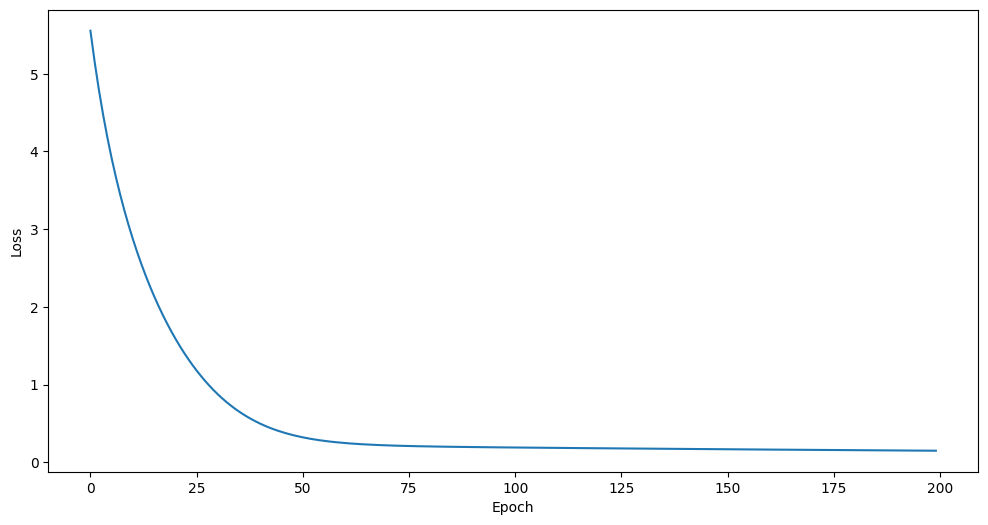

In [12]:
# Plot your training loss throughout the training
# Include proper x and y labels for the plot

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
# The issue was that the length of train_loss_list could be longer
# than the number of epochs depending on whether the cell was run previously
# range(epochs) creates a range object corresponding to the number of epochs trained
plt.plot(range(epochs), train_loss_list[:epochs]) # Only plot the losses for the actual epochs run in this execution
plt.xlabel('Epoch')
plt.ylabel('Loss')
# YOUR CODE HERE

In [14]:
import numpy as np

with torch.no_grad():

    # Compare your model predictions with targets (y_train) to compute the training accuracy

    predicted = model(inputs).cpu().numpy()

    # YOUR CODE HERE

# Training accuracy = (# of correct predictions) / (total # of training samples)
correct = 0
for i in range(150):
    # Check if the prediction is NaN and replace it with a default value if needed
    if np.isnan(predicted[i][0]):
        # skip this prediction or replace it with a default value (e.g., 0)
        print(f"Warning: NaN prediction encountered at index {i}, skipping...")
        continue  # Skip to the next iteration

    predicted_output = round(predicted[i][0])
    if predicted_output == iris['target'][i]:
        correct += 1
print(correct/150)

0.8533333333333334
